After receiving two databases, each for a different vehicle, from the company we determined their size and structure.

In [52]:
import pandas as pd
from pathlib import Path

import warnings
warnings.filterwarnings("ignore")

# Load databases
path = Path.cwd().parents[0]
json_file1 = path/"data/json_folder/0000AAA.json"
json_file2 = path/"data/json_folder/0001AAA.json"

dataframe1 = pd.read_json(json_file1)
dataframe1.name = "dataframe1"
dataframe2 = pd.read_json(json_file2)
dataframe2.name = "dataframe2"

print("-"*10,"SHAPE","-"*10)
print("Shape of dataframe1: ", dataframe1.shape)
print("Shape of dataframe2: ", dataframe2.shape)


---------- SHAPE ----------
Shape of dataframe1:  (2027, 16)
Shape of dataframe2:  (6725, 17)


We noticed that the first file has fewer entries and one attribute less. We determined which attribute this was.

In [36]:
# Convert the columns of each dataframe to a set
columnas_df1 = set(dataframe1.columns)
columnas_df2 = set(dataframe2.columns)

# Remove attributes in both datasets to isolate the extra attribute in dataframe2. 
additional_column = columnas_df2 - columnas_df1
print(additional_column)
print()

# Obtain information on this extra attribute.
print(dataframe2[additional_column].info())

{'t_longitude'}

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6725 entries, 0 to 6724
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   t_longitude  1 non-null      float64
dtypes: float64(1)
memory usage: 52.7 KB
None


We noticed that the extra attribute was labled 't_longitude' and only had one value. After checking all the other attributes, we noticed that we could find the index number that contained the value of this column. We assumed that this represented an error in the data and could correct this by converting the attribute to 'out_longitude'. 

In [37]:
# Detect the entry that is non-null and return the index number to a list.
notnull_index = dataframe2[dataframe2['t_longitude'].notnull()].index.tolist()
print("Index that contains the value in 't_longitude': ", notnull_index)
print()

# Check if this index number has a NaN entry in the 'out_longitude' column.
df = dataframe2[["out_longitude", "t_longitude"]]
print(df.iloc[notnull_index])
print()

# Change the value of 't_longitude' to 'out_longitude'.
dataframe2['out_longitude'].iloc[notnull_index] = dataframe2['t_longitude'].iloc[notnull_index]

# Delete the column 't_longitude'.
dataframe2 = dataframe2.drop(columns=["t_longitude"])

Index that contains the value in 't_longitude':  [5582]

      out_longitude  t_longitude
5582            NaN    -3.656348



Now that we have 16 attributes, we determine and explain their formats:

In [38]:
print(dataframe2.head(2))

   out_vehicle_id out_registration          out_event_ts  out_driver  \
0        32716286          0001AAA  2022-09-02T00:25:25Z         NaN   
1        32716286          0001AAA  2022-09-02T01:31:25Z         NaN   

   out_longitude  out_speed         out_event_description  out_event_odo  \
0      -3.649428          0  28053 Madrid (Madrid), Spain       43052920   
1      -3.649436          0  28053 Madrid (Madrid), Spain       43052920   

  out_terminal_serial ignition  temp1  temp2  temp3  temp4  door1_status  \
0            CD139089        f   26.5   26.7    NaN    NaN           NaN   
1            CD139089        f   25.8   25.8    NaN    NaN           NaN   

   door2_status  
0           NaN  
1           NaN  


In [39]:
dataframe2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6725 entries, 0 to 6724
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   out_vehicle_id         6725 non-null   int64  
 1   out_registration       6725 non-null   object 
 2   out_event_ts           6725 non-null   object 
 3   out_driver             0 non-null      float64
 4   out_longitude          6725 non-null   float64
 5   out_speed              6725 non-null   int64  
 6   out_event_description  6725 non-null   object 
 7   out_event_odo          6725 non-null   int64  
 8   out_terminal_serial    6725 non-null   object 
 9   ignition               6689 non-null   object 
 10  temp1                  6689 non-null   float64
 11  temp2                  6681 non-null   float64
 12  temp3                  0 non-null      float64
 13  temp4                  0 non-null      float64
 14  door1_status           0 non-null      float64
 15  door

| Attribute | Description |
| --- | --- |
| "out_vehicle_id" | Vehicle identification number. |
| "out_registration" | Vehicle license plate number. |
| "out_event_ts" | Timestamp of when the data is received. |
| "out_driver" | Driver information (NO DATA). |
| "out_longitude" | Longitude coordinates of the vehicle. |
| "out_speed" | Speed of the vehicle when data is received. |
| "out_event_description | Text field with location data: municipalty, province and postal code. |
| "out_event_odo" | Latitude coordinates of the vehicle. |
| "out_terminal_serial" | Device serial number. |
| "ignition" | Vehicle status (engine on or off). |
| "temp1", "temp2", "temp3", "temp4" | Temperature registered in ºC by the vehicle sensor. |
| "door_status1", "door_status2" | Status of the vehicle refrigerating chamber (open or closed).

We identified and removed any duplicate entries with identical timestamps

In [40]:
for i, df in enumerate([dataframe1, dataframe2], 1):
    duplicated_values_df = df["out_event_ts"].duplicated().sum()
    print(f"Number of duplicates in dataframe{i}: ", duplicated_values_df)
    print(f"Percent of duplicates in dataframe{i}: ", round(duplicated_values_df/len(df)*100,2), "%")
    print()

Number of duplicates in dataframe1:  18
Percent of duplicates in dataframe1:  0.89 %

Number of duplicates in dataframe2:  273
Percent of duplicates in dataframe2:  4.06 %



We analysed the duplicate entries in our data bases to take appropriate steps:

In [41]:
# Obtain a mask of the duplicate entries.
for i, df in enumerate([dataframe1, dataframe2],1):
    print("-"*10,f"dataframe{i}","-"*10)
    df_mask = df["out_event_ts"].duplicated(keep=False)
    df_m = df[df_mask]
    print("Shape_m: ", df_m.shape)
    print()

df_m.head(6)


---------- dataframe1 ----------
Shape_m:  (36, 16)

---------- dataframe2 ----------
Shape_m:  (526, 16)



,out_vehicle_id,out_registration,out_event_ts,out_driver,out_longitude,out_speed,out_event_description,out_event_odo,out_terminal_serial,ignition,temp1,temp2,temp3,temp4,door1_status,door2_status
2,32716286,0001AAA,2022-09-02T01:31:26Z,NaN,-3.649436,0,"28053 Madrid (Madrid), Spain",43052920,CD139089,t,25.8,25.8,NaN,NaN,NaN,NaN
3,32716286,0001AAA,2022-09-02T01:31:26Z,NaN,-3.649436,0,"28053 Madrid (Madrid), Spain",43052920,CD139089,t,25.8,25.8,NaN,NaN,NaN,NaN
12,32716286,0001AAA,2022-09-02T01:33:03Z,NaN,-3.649391,0,"28053 Madrid (Madrid), Spain",43052930,CD139089,t,25.8,25.8,NaN,NaN,NaN,NaN
13,32716286,0001AAA,2022-09-02T01:33:03Z,NaN,-3.649391,0,"28053 Madrid (Madrid), Spain",43052930,CD139089,t,25.8,25.8,NaN,NaN,NaN,NaN
16,32716286,0001AAA,2022-09-02T03:18:27Z,NaN,-3.649421,0,"28053 Madrid (Madrid), Spain",43052930,CD139089,f,24.8,24.6,NaN,NaN,NaN,NaN
17,32716286,0001AAA,2022-09-02T03:18:27Z,NaN,-3.649421,0,"28053 Madrid (Madrid), Spain",43052930,CD139089,f,24.8,24.6,NaN,NaN,NaN,NaN


By looking the indices we could see that the duplicate entries were consecutive entries and that the values for the each attribute were identical. We could eliminate the duplicate entries without this affecting out model, keeping only unique the last of each duplicate entry.

In [42]:
for i, df in enumerate([dataframe1, dataframe2],1):
    print("-"*10,f"dataframe{i}","-"*10)
    print(f"Shape BEFORE: ", dataframe1.shape)
    df.drop_duplicates(subset="out_event_ts", keep="last", inplace=True)
    print(f"Shape AFTER: ", dataframe1.shape)
    print()

---------- dataframe1 ----------
Shape BEFORE:  (2027, 16)
Shape AFTER:  (2009, 16)

---------- dataframe2 ----------
Shape BEFORE:  (2009, 16)
Shape AFTER:  (2009, 16)



We got a deeper understanding of the Null values in our data base:

In [43]:
null_df = pd.DataFrame()

for i, df in enumerate([dataframe1, dataframe2],1):
    null_df[f"null_{i}"] = df.isnull().sum()
    null_df[f"null_{i}_%"] = round(df.isnull().mean()*100, 2)
    
null_df

,null_1,null_1_%,null_2,null_2_%
out_vehicle_id,0,0.0,0,0.00
out_registration,0,0.0,0,0.00
out_event_ts,0,0.0,0,0.00
out_driver,2009,100.0,6452,100.00
out_longitude,0,0.0,0,0.00
out_speed,0,0.0,0,0.00
out_event_description,0,0.0,0,0.00
out_event_odo,0,0.0,0,0.00
out_terminal_serial,0,0.0,0,0.00
ignition,14,0.7,33,0.51


Since all the values in the attribues 'out_driver', 'temp3', 'temp4', 'door1_status' and 'door2_status' were null for each file, we could eliminate these attributes.

In [44]:
unnecesary_columns = ["out_driver", "temp3", "temp4", "door1_status", "door2_status"]

dataframe1 = dataframe1.drop(columns=unnecesary_columns)
dataframe2 = dataframe2.drop(columns=unnecesary_columns)

The missing values of 'temp1' coincide with the missing values of 'ignition', and to a lesser extent (in the case of the second dataframe) in the missing values of 'temp2', as can be seen in the venn diagram.

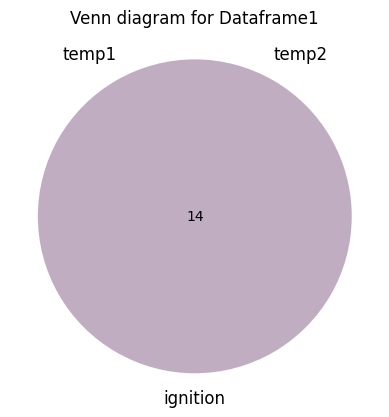

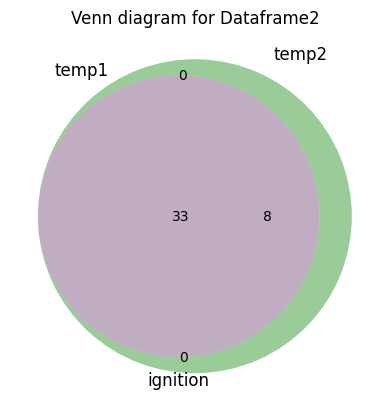

In [45]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

for i, df in enumerate([dataframe1, dataframe2],1):
    df_name = f"dataframe{i}"
    null_list = []
    for atribute in ["temp1", "temp2", "ignition"]:
        null_index = df[df[atribute].isnull()].index.tolist()
        atribute_set = set(null_index)
        null_list.append(atribute_set)

    # Unpack the list.
    temp1_index, temp2_index, ignition_index = null_list

    # Draw the venn diagram
    venn3([temp1_index, temp2_index, ignition_index], ("temp1", "temp2", "ignition"))
    plt.title(f"Venn diagram for Dataframe{i}")
    plt.show()  

Since the percent of null values doesn't exceed 1% of the total in any case, we can safely delete these entries and this will not alter the results of our model.

In [46]:
dataframe1.dropna(subset=["ignition", "temp2"], inplace=True)
dataframe2.dropna(subset=["ignition", "temp2"], inplace=True)

# Check that no empty entries exist.
for i, df in enumerate([dataframe1, dataframe2],1):
    print("-"*10,f"dataframe{i}","-"*10)
    print("Number of nan in 'ignition': ", df["ignition"].isnull().sum())
    print("Number of nan in 'temp1': ", df["temp1"].isnull().sum())
    print("Number of nan in 'temp2': ", df["temp2"].isnull().sum())
    print("Shape: ", df.shape)
    print()

---------- dataframe1 ----------
Number of nan in 'ignition':  0
Number of nan in 'temp1':  0
Number of nan in 'temp2':  0
Shape:  (1995, 11)

---------- dataframe2 ----------
Number of nan in 'ignition':  0
Number of nan in 'temp1':  0
Number of nan in 'temp2':  0
Shape:  (6411, 11)



We analysed the categories within the 'ignition' category.

In [47]:
for i, df in enumerate([dataframe1, dataframe2],1):
    print("-"*10,f"dataframe{i}","-"*10)
    print("Values for the attribute 'ignition': ", df["ignition"].unique())
    print()

---------- dataframe1 ----------
Values for the attribute 'ignition':  ['f' 't']

---------- dataframe2 ----------
Values for the attribute 'ignition':  ['f' 't']



We replaced the values 'f' and 't' for 0 and 1 respectively.


In [48]:
dataframe1["ignition"] = dataframe1["ignition"].map({"t":1, "f":0})
dataframe2["ignition"] = dataframe2["ignition"].map({"t":1, "f":0})

# Check again.
for i, df in enumerate([dataframe1, dataframe2],1):
    print("-"*10,f"dataframe{i}","-"*10)
    print("Values for the attribute 'ignition': ", df["ignition"].unique())
    print()

---------- dataframe1 ----------
Values for the attribute 'ignition':  [0 1]

---------- dataframe2 ----------
Values for the attribute 'ignition':  [0 1]



Since we recieved two files corresponding to two distinct vehicles, and our task concerns predicting time series, we will analyse both files to determine the time interval for each vehicle.

In [49]:
# Format the time value in the "out_event_ts" column.
for i, df in enumerate([dataframe1, dataframe2],1):
    print("-"*10,f"dataframe{i}","-"*10)
    df["out_event_ts"] = pd.to_datetime((df["out_event_ts"]))
    df["out_event_ts"] = df["out_event_ts"].dt.tz_localize(None)
    print("Time intervals:")
    print("\tFirst log:  {}".format(df["out_event_ts"].min()))
    print("\tLast log:  {}".format(df["out_event_ts"].max()))
    print("\tElipsed time: {}\n".format(df["out_event_ts"].max()-df["out_event_ts"].min() ))
    print()

dataframe1["out_event_ts"].info()


---------- dataframe1 ----------
Time intervals:
	First log:  2022-09-20 00:38:19
	Last log:  2022-09-20 21:27:03
	Elipsed time: 0 days 20:48:44


---------- dataframe2 ----------
Time intervals:
	First log:  2022-09-02 00:25:25
	Last log:  2022-09-20 21:40:30
	Elipsed time: 18 days 21:15:05


<class 'pandas.core.series.Series'>
Int64Index: 1995 entries, 0 to 2011
Series name: out_event_ts
Non-Null Count  Dtype         
--------------  -----         
1995 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 31.2 KB


We observed that for the data corresponding to the second vehicle the time interval is 18 days, compared to one day for the first vehicle. This makes it difficult to use predictive models based on historic data, and even more so in models such as Prohpet.

One of the project objectives was to have data recorded every 5 minutes. We analysed the interval between each entry.

In [50]:
def interval_generator(serie):
    """Receives a series in datetime format and returns a new
    attribute which shows the time interval between entries and is 
    included in the dataframe"""
    n_total = len(serie)
    interval_list = []
    for i in range(0, n_total):
        if i < n_total-1:
            time_final = serie.iloc[i+1]
            time_init = serie.iloc[i]
            interval = (time_final - time_init)
            interval_list.append(interval)
        
        else:
            interval_list.append(None)
    
    return interval_list


for df in [dataframe1, dataframe2]:
    df["interval_time"] = interval_generator(df["out_event_ts"])

We obtained the minumum, maximum and average interval times of this new column.

In [51]:
for i, df in enumerate([dataframe1, dataframe2],1):
    print("-"*10,f"dataframe{i}","-"*10)
    print(df["interval_time"].describe())
    print("The mode is: {}".format(df["interval_time"].mode()))
    print()


---------- dataframe1 ----------
count                         1994
mean     0 days 00:00:37.574724172
std      0 days 00:03:08.648930953
min                0 days 00:00:01
25%                0 days 00:00:10
50%                0 days 00:00:10
75%                0 days 00:00:16
max                0 days 01:09:35
Name: interval_time, dtype: object
The mode is: 0   0 days 00:00:10
Name: interval_time, dtype: timedelta64[ns]

---------- dataframe2 ----------
count                         6410
mean     0 days 00:04:14.556162246
std      0 days 00:17:34.214506031
min                0 days 00:00:01
25%                0 days 00:00:08
50%                0 days 00:00:10
75%                0 days 00:00:18
max                0 days 07:51:43
Name: interval_time, dtype: object
The mode is: 0   0 days 00:00:10
Name: interval_time, dtype: timedelta64[ns]



We observed that there was a wide range of time intervals, from **1 second** to **6 hours and 39 minutes**

The mode for the intervals in both dataframes is 10 seconds.
Since the objectives called for readings every 5 minutes, we will have to generate new entries to ensure that consecutive readings do not exceed 5 minutes and use these to generate predictions..